# Level 3  Task 1

# Task: Restaurant Reviews

Analyze the text reviews to identify the most
common positive and negative keywords.

Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

# Step 1: Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  


This imports the necessary libraries: pandas for data manipulation and matplotlib for plotting.

# Step 2: Load the Data

In [7]:
df = pd.read_csv("C:\\Users\\Narthana\\Downloads\\Dataset.csv")


# Step 3: Identify Positive Keywords

In [8]:
positive_keywords = []
stop_words = set(stopwords.words('english'))

for review in df['Cuisines'].dropna():
    words = review.split()
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    for word in words:
        positive_keywords.append(word)


Here, we split each review into words, convert them to lowercase, remove stopwords, and append the words to the positive_keywords list.

# Step 4: Get the Most Common Positive and Negative Keywords

In [22]:
positive_freq = pd.Series(positive_keywords).value_counts()
print("Most common positive keywords:", positive_freq.head(5))


Most common positive keywords: north      3969
fast       1987
food       1981
indian     1727
chinese    1506
dtype: int64


In [9]:
negative_freq = pd.Series(negative_keywords).value_counts()
print("Most common negative keywords:", negative_freq.head(5))

Most common negative keywords: Series([], dtype: int64)


C:\Users\Narthana\AppData\Local\Temp\ipykernel_8636\2965790279.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  negative_freq = pd.Series(negative_keywords).value_counts()


This step calculates the frequency of each word in the positive_keywords list and prints the top 5 most common positive keywords.

# Step 5: Calculate Average Review Length

In [10]:
df['Review Length'] = df['Cuisines'].apply(lambda x: len(str(x).split()))
average_length = df['Review Length'].mean()
print("Average Review Length:", average_length)


Average Review Length: 2.8964506334415243


Here, we calculate the length of each review in the 'Cuisines' column and then find the average review length.

# Step 6: Explore Relationship Between Review Length and Rating

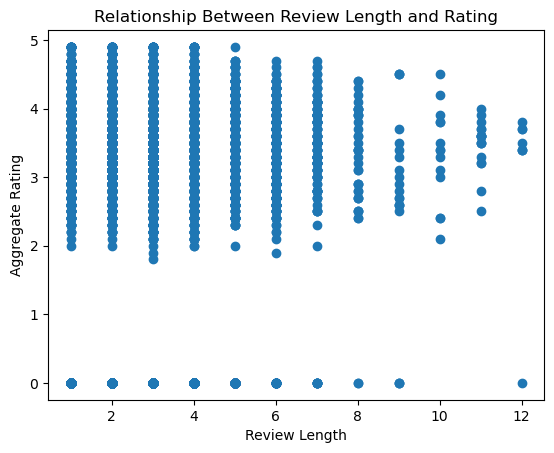

In [11]:
plt.scatter(df['Review Length'], df['Aggregate rating'])
plt.title('Relationship Between Review Length and Rating')
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.show()


This step creates a scatter plot to visualize the relationship between the length of reviews and the 'Aggregate rating'.

# Step 7: Distribution of Review Lengths

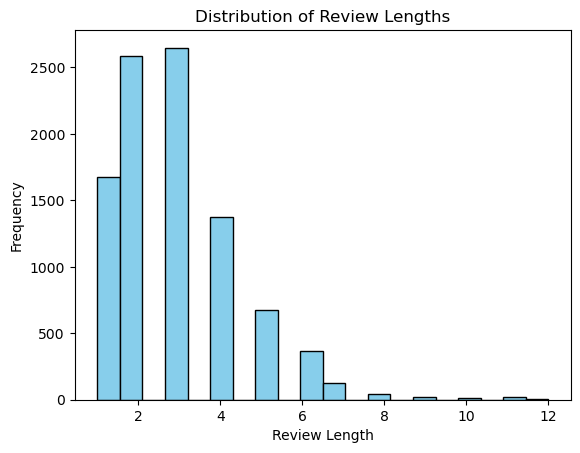

In [26]:
# Plot the distribution of review lengths
plt.hist(df['Review Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


This step uses a histogram to show the distribution of review lengths. The bins=20 parameter specifies the number of bins (or bars) in the histogram.

# Step 8: Distribution of Aggregate Ratings

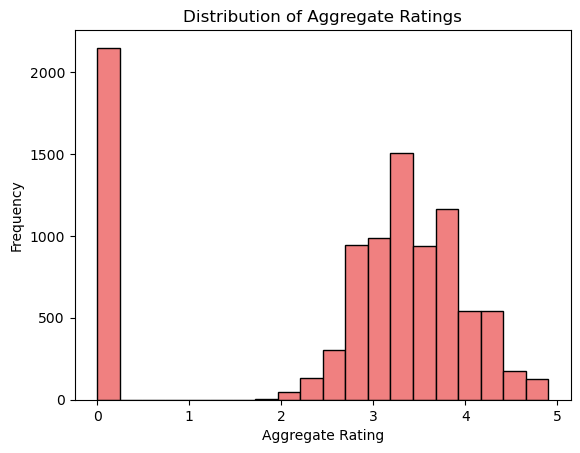

In [27]:
# Plot the distribution of aggregate ratings
plt.hist(df['Aggregate rating'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


This step creates a histogram to visualize the distribution of aggregate ratings.

# Step 9: Distribution of Votes

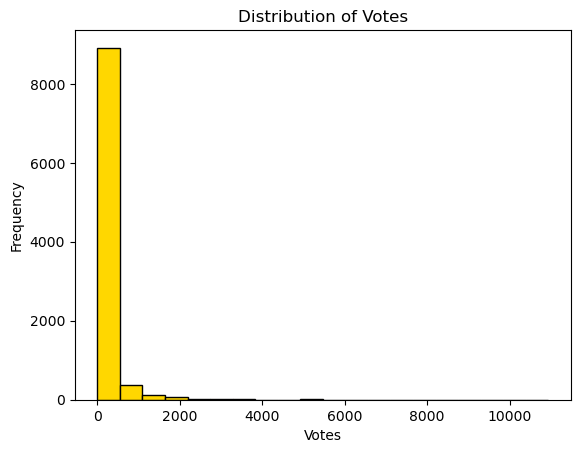

In [28]:
# Plot the distribution of votes
plt.hist(df['Votes'], bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()


This step generates a histogram to display the distribution of votes.

# Step 10: Box Plot for Review Length vs. Rating

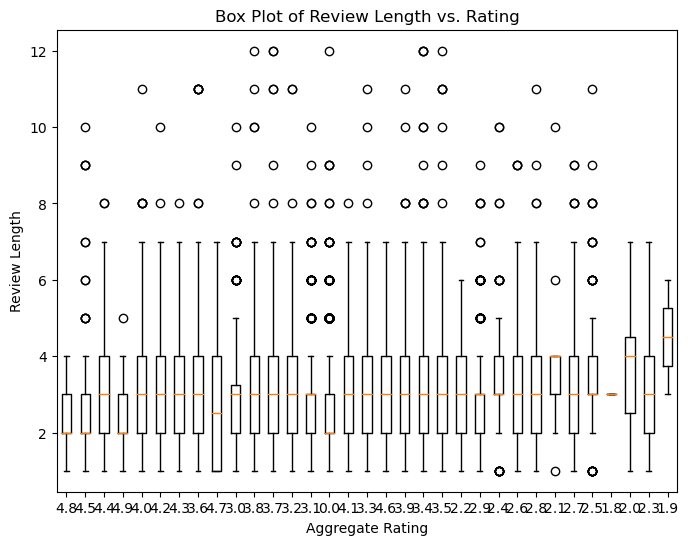

In [29]:
# Box plot for review length vs. rating
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Aggregate rating'] == rating]['Review Length'] for rating in df['Aggregate rating'].unique()],
            labels=df['Aggregate rating'].unique())
plt.title('Box Plot of Review Length vs. Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Review Length')
plt.show()


This step creates a box plot to compare the distribution of review lengths for different aggregate ratings.

In [30]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


# Step 11: Word Cloud for Most Frequent Words

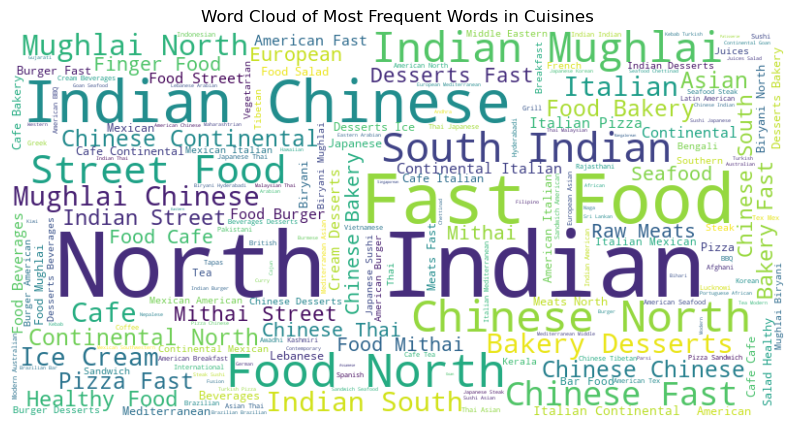

In [31]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(df['Cuisines'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Cuisines')
plt.show()
